# Sentiment-Analysis-Twitter

Python code to perform a sentiment analysis of world mood based on the most recent tweets and plot the results according to the Twitter profiles of the news agencies.  Libraries used includes: Matplotlib, Pandas, Tweepy, VADER Sentiment Analysis and Seaborn.

In [1]:
import tweepy
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
import seaborn as sns
import csv
import requests
import json
import urllib
from pprint import pprint
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Twitter API Keys
consumer_key = "SiJRijm7ObX5Ysk2rcRYZYkZH"
consumer_secret = "TQUEDmF1r6gW7X8pWJZSeZj5HdhVWvfQSNneuu0nOUaBoENL4s"
access_token = "1011035866913861632-mVKIjo0W5o2D9mWTLtquhT1cJVyyUX"
access_token_secret = "z1H4QR5lzBDL4ReaJXjQDlc9Uq7KOwaxqT3Lc0OirYHI8"

In [2]:
# Twitter Credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
#select news sources
news_source = ("FoxNews", "CNN", "BBC", "CBS", "nytimes")

In [4]:
#Array to hold sentiments
sentiments = []

In [5]:
#Loop thru all news sources
for user in news_source:
    counter = 0
    
    #Get all tweets from the homefeed of each news organization
    news_tweets = api.user_timeline(user, count = 100)
    
    #Loop thru all tweets
    for tweet in news_tweets:
        
        #Run the Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]          
        
        #Add sentiments for each tweet to the sentiments list
        sentiments.append({"User": user,
                           "Source account":tweet["source"],
                           "Date": tweet["created_at"],
                           "Text": tweet["text"],
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets count": counter})
            
        counter = counter+1

print(sentiments)

[{'User': 'FoxNews', 'Source account': '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>', 'Date': 'Mon Sep 17 00:33:27 +0000 2018', 'Text': '.@RepMcSally: "It\'s extremely frustrating that the Democrats have been obstructing border security."… https://t.co/XxjRrUByqA', 'Compound': -0.4927, 'Positive': 0.0, 'Negative': 0.79, 'Neutral': 0.21, 'Tweets count': 0}, {'User': 'FoxNews', 'Source account': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'Date': 'Mon Sep 17 00:30:00 +0000 2018', 'Text': ".@GovMikeHuckabee: @JohnKerry Talking to Iranians 'Makes the Case' for First-Ever Logan Act Conviction. https://t.co/yBjxvCp2h7", 'Compound': 0.0, 'Positive': 0.0, 'Negative': 1.0, 'Neutral': 0.0, 'Tweets count': 1}, {'User': 'FoxNews', 'Source account': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'Date': 'Mon Sep 17 00:30:00 +0000 2018', 'Text': 'US flag seen shredded by Hurricane Florence off

In [6]:
#convert to dataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Source account,Text,Tweets count,User
0,-0.4927,Mon Sep 17 00:33:27 +0000 2018,0.790,0.21,0.000,"<a href=""https://studio.twitter.com"" rel=""nofo...",".@RepMcSally: ""It's extremely frustrating that...",0,FoxNews
1,0.0000,Mon Sep 17 00:30:00 +0000 2018,1.000,0.00,0.000,"<a href=""https://about.twitter.com/products/tw...",.@GovMikeHuckabee: @JohnKerry Talking to Irani...,1,FoxNews
2,0.5423,Mon Sep 17 00:30:00 +0000 2018,0.829,0.00,0.171,"<a href=""https://about.twitter.com/products/tw...",US flag seen shredded by Hurricane Florence of...,2,FoxNews
3,0.0516,Mon Sep 17 00:22:00 +0000 2018,0.893,0.00,0.107,"<a href=""https://about.twitter.com/products/tw...",Military couple escaping Florence's path gives...,3,FoxNews
4,0.0000,Mon Sep 17 00:15:56 +0000 2018,1.000,0.00,0.000,"<a href=""https://studio.twitter.com"" rel=""nofo...",DACA recipient Erika Andiola on a wall along t...,4,FoxNews


In [11]:
#export dataframe to csv
sentiments_pd.to_csv("sentiment_analysis.csv", encoding="utf-8")


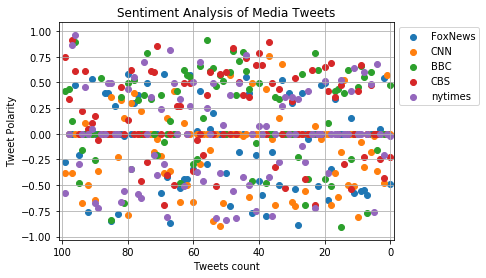

In [12]:
#plot scatterplot graph

#Set the x limit
plt.xlim(101, -1)

#plot scatterplot using a for loop.
for user in news_source:
    dataframe = sentiments_pd.loc[sentiments_pd["User"] == user]
    plt.scatter(dataframe["Tweets count"], dataframe["Compound"], label = user)
    
#Add legend
plt.legend(bbox_to_anchor = (1, 1))

#Add title, x axis label, and y axis label
plt.title("Sentiment Analysis of Media Tweets")
plt.xlabel("Tweets count")
plt.ylabel("Tweet Polarity")

#set a grid on the plot
plt.grid()

plt.savefig("Sentitment Analysis of Media Tweets")
plt.show()

In [14]:
average_sentiment = sentiments_pd.groupby("User")["Compound"].mean()
average_sentiment

User
BBC        0.156644
CBS        0.157366
CNN       -0.114721
FoxNews   -0.069458
nytimes   -0.001381
Name: Compound, dtype: float64

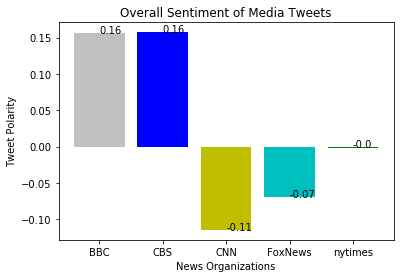

In [19]:
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index
count = 0
for sentiment in average_sentiment:
    plt.text(count, sentiment, str(round(sentiment, 2)))
    count = count + 1
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['silver', 'b', 'y', 'c', 'g'])

plt.title("Overall Sentiment of Media Tweets")
plt.xlabel("News Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of Media Tweets")
plt.show()